공공데이터 과제 2
- 지하철 각 노선별 최대 하차 인원을 막대그래프로 표시하고, 하차인원 출력
    - 출근 시간대 : 07:00~08:59
    - 사용파일 : subwaytime.csv 또는 subway.xls
        - 07:00~07:59 하차 : index[11], 08:00~08:59 하차: index[13]
    - 각 지하철 노선별 가장 많이 내리는 지하철 역 분석
        - 1호선, 2호선, 3호선, 4호선, 5호선, 6호선, 7호선
    - 하차 인원은 1,000단위로 콤마를 찍어서 구분할 것
    - 7개의 지하철 역을 막대 그래프로 표시
    - Bar chart의 x축은 (노선 + 지하철 역 이름)을 표시하고, y축은 인원수를 표시

- 실행결과(화면 출력 내용)
    - 출근 시간대 1호선 최대 하차역: 종각역, 하차 인원: 356,704명
- 그래프 출력
    - 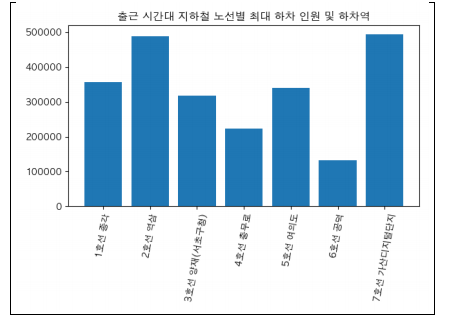

In [1]:
# 필요한 모듈과 패키지 import
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 혹시나 xticks에 필요할 수도 있어서
import numpy as np

In [2]:
# 시간대별 하차 인원...
# 최대 승차를 바꿔서 하차로..

time_df = pd.read_csv('../data/subwaytime.csv')
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   사용월                622 non-null    object 
 1   호선명                622 non-null    object 
 2   역ID                622 non-null    float64
 3   지하철역               622 non-null    object 
 4   04:00:00~04:59:59  623 non-null    object 
 5   Unnamed: 5         623 non-null    object 
 6   05:00:00~05:59:59  623 non-null    object 
 7   Unnamed: 7         623 non-null    object 
 8   06:00:00~06:59:59  623 non-null    object 
 9   Unnamed: 9         623 non-null    object 
 10  07:00:00~07:59:59  623 non-null    object 
 11  Unnamed: 11        623 non-null    object 
 12  08:00:00~08:59:59  623 non-null    object 
 13  Unnamed: 13        623 non-null    object 
 14  09:00:00~09:59:59  623 non-null    object 
 15  Unnamed: 15        623 non-null    object 
 16  10:00:00~10:59:59  623 non

In [3]:
time_df.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,Jun.24,1호선,150.0,서울역,654,20,8727,9083,13812,56637,...,27544,13883,2863,3984,3,215,0,0,0,0
2,Jun.24,1호선,151.0,시청,74,0,2105,5374,4050,25949,...,10250,3898,502,991,1,38,0,0,0,0
3,Jun.24,1호선,152.0,종각,132,7,4291,5787,4312,32747,...,26952,4587,1676,1300,0,0,0,0,0,0
4,Jun.24,1호선,153.0,종로3가,206,13,4296,3015,3961,13851,...,18427,5240,1765,2042,2,6,0,0,0,0


In [6]:
# 필요한 칼럼만 추출
sub_df = time_df.loc[:, ['호선명', '지하철역', '07:00:00~07:59:59', 'Unnamed: 11', '08:00:00~08:59:59', 'Unnamed: 13']]
sub_df.head()

,호선명,지하철역,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13
0,NaN,NaN,승차,하차,승차,하차
1,1호선,서울역,40205,115372,68945,224224
2,1호선,시청,7703,71550,10616,183563
3,1호선,종각,6588,106889,10892,249815
4,1호선,종로3가,5968,28024,10284,65287


In [8]:
sub_df = sub_df.drop(index=0).reset_index()
sub_df.head()

,index,호선명,지하철역,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13
0,1,1호선,서울역,40205,115372,68945,224224
1,2,1호선,시청,7703,71550,10616,183563
2,3,1호선,종각,6588,106889,10892,249815
3,4,1호선,종로3가,5968,28024,10284,65287
4,5,1호선,종로5가,5783,40044,10330,91110


In [10]:
sub_df['Unnamed: 11'] = sub_df['Unnamed: 11'].astype('int')
sub_df['Unnamed: 13'] = sub_df['Unnamed: 13'].astype('int')
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              622 non-null    int64 
 1   호선명                622 non-null    object
 2   지하철역               622 non-null    object
 3   07:00:00~07:59:59  622 non-null    object
 4   Unnamed: 11        622 non-null    int64 
 5   08:00:00~08:59:59  622 non-null    object
 6   Unnamed: 13        622 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 34.1+ KB


In [14]:
sub_df = sub_df.drop(columns='index')
sub_df

,호선명,지하철역,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13
0,1호선,서울역,40205,115372,68945,224224
1,1호선,시청,7703,71550,10616,183563
2,1호선,종각,6588,106889,10892,249815
3,1호선,종로3가,5968,28024,10284,65287
4,1호선,종로5가,5783,40044,10330,91110
...,...,...,...,...,...,...
617,신림선,당곡,13139,3680,18938,8693
618,신림선,신림,4143,1493,6575,2688
619,신림선,서원,12816,1405,18655,2360
620,신림선,서울대벤처타운,29843,6223,41525,10011


In [15]:
sub_df.columns = ['호선명', '지하철역', '승차7', '하차7', '승차8', '하차8']
sub_df.head()

,호선명,지하철역,승차7,하차7,승차8,하차8
0,1호선,서울역,40205,115372,68945,224224
1,1호선,시청,7703,71550,10616,183563
2,1호선,종각,6588,106889,10892,249815
3,1호선,종로3가,5968,28024,10284,65287
4,1호선,종로5가,5783,40044,10330,91110


In [16]:
# 최대 하차인원
# 7시 8시 하차인원의 합으로 찾을까?
sub_df['total'] = sub_df['하차7'] + sub_df['하차8']
sub_df

,호선명,지하철역,승차7,하차7,승차8,하차8,total
0,1호선,서울역,40205,115372,68945,224224,339596
1,1호선,시청,7703,71550,10616,183563,255113
2,1호선,종각,6588,106889,10892,249815,356704
3,1호선,종로3가,5968,28024,10284,65287,93311
4,1호선,종로5가,5783,40044,10330,91110,131154
...,...,...,...,...,...,...,...
617,신림선,당곡,13139,3680,18938,8693,12373
618,신림선,신림,4143,1493,6575,2688,4181
619,신림선,서원,12816,1405,18655,2360,3765
620,신림선,서울대벤처타운,29843,6223,41525,10011,16234


In [18]:
# 멀티 인덱스를 쓰면...
sub_time_df = sub_df.set_index(['호선명', '지하철역'])
sub_time_df.head()

승차7     하차7     승차8     하차8   total
호선명 지하철역                                        
1호선 서울역   40205   115372  68945   224224  339596
    시청     7703    71550  10616   183563  255113
    종각     6588   106889  10892   249815  356704
    종로3가   5968    28024  10284    65287   93311
    종로5가   5783    40044  10330    91110  131154

In [21]:
sub_time_df.loc['1호선']['total'].max()

np.int64(356704)

In [46]:
sub_time_df.loc['1호선'][sub_time_df.loc['1호선']['total'] == sub_time_df.loc['1호선']['total'].max()].index.values

array(['종각'], dtype=object)

In [26]:
# 호선별 최대 하차인원 리스트
max_num_list = []
max_num_list.append(int(sub_time_df.loc['1호선']['total'].max()))
max_num_list.append(int(sub_time_df.loc['2호선']['total'].max()))
max_num_list.append(int(sub_time_df.loc['3호선']['total'].max()))
max_num_list.append(int(sub_time_df.loc['4호선']['total'].max()))
max_num_list.append(int(sub_time_df.loc['5호선']['total'].max()))
max_num_list.append(int(sub_time_df.loc['6호선']['total'].max()))
max_num_list.append(int(sub_time_df.loc['7호선']['total'].max()))
print(max_num_list)

[356704, 488949, 318850, 224078, 340464, 131646, 494848]


In [37]:
# 호선별 최대 하차역 리스트
max_station_list = []
max_station_list.append(sub_time_df.loc['1호선'][sub_time_df.loc['1호선']['total'] == sub_time_df.loc['1호선']['total'].max()].index.values)
max_station_list.append(sub_time_df.loc['2호선'][sub_time_df.loc['2호선']['total'] == sub_time_df.loc['2호선']['total'].max()].index.values)
max_station_list.append(sub_time_df.loc['3호선'][sub_time_df.loc['3호선']['total'] == sub_time_df.loc['3호선']['total'].max()].index.values)
max_station_list.append(sub_time_df.loc['4호선'][sub_time_df.loc['4호선']['total'] == sub_time_df.loc['4호선']['total'].max()].index.values)
max_station_list.append(sub_time_df.loc['5호선'][sub_time_df.loc['5호선']['total'] == sub_time_df.loc['5호선']['total'].max()].index.values)
max_station_list.append(sub_time_df.loc['6호선'][sub_time_df.loc['6호선']['total'] == sub_time_df.loc['6호선']['total'].max()].index.values)
max_station_list.append(sub_time_df.loc['7호선'][sub_time_df.loc['7호선']['total'] == sub_time_df.loc['7호선']['total'].max()].index.values)
print(max_station_list)

[array(['종각'], dtype=object), array(['역삼'], dtype=object), array(['양재(서초구청)'], dtype=object), array(['충무로'], dtype=object), array(['여의도'], dtype=object), array(['공덕'], dtype=object), array(['가산디지털단지'], dtype=object)]


In [48]:
# 결과 출력
for i in range(len(max_num_list)):
    print(f"출근 시간대 {i+1}호선 최대 하차역: {max_station_list[i][0]}역, 하차인원: {max_num_list[i]:,}명")

출근 시간대 1호선 최대 하차역: 종각역, 하차인원: 356,704명
출근 시간대 2호선 최대 하차역: 역삼역, 하차인원: 488,949명
출근 시간대 3호선 최대 하차역: 양재(서초구청)역, 하차인원: 318,850명
출근 시간대 4호선 최대 하차역: 충무로역, 하차인원: 224,078명
출근 시간대 5호선 최대 하차역: 여의도역, 하차인원: 340,464명
출근 시간대 6호선 최대 하차역: 공덕역, 하차인원: 131,646명
출근 시간대 7호선 최대 하차역: 가산디지털단지역, 하차인원: 494,848명


In [54]:
max_num_list_xticks = []
for i in range(len(max_num_list)):
    max_num_list_xticks.append(f"{i+1}호선 {str(max_station_list[i][0])}역")
print(max_num_list_xticks)

['1호선 종각역', '2호선 역삼역', '3호선 양재(서초구청)역', '4호선 충무로역', '5호선 여의도역', '6호선 공덕역', '7호선 가산디지털단지역']


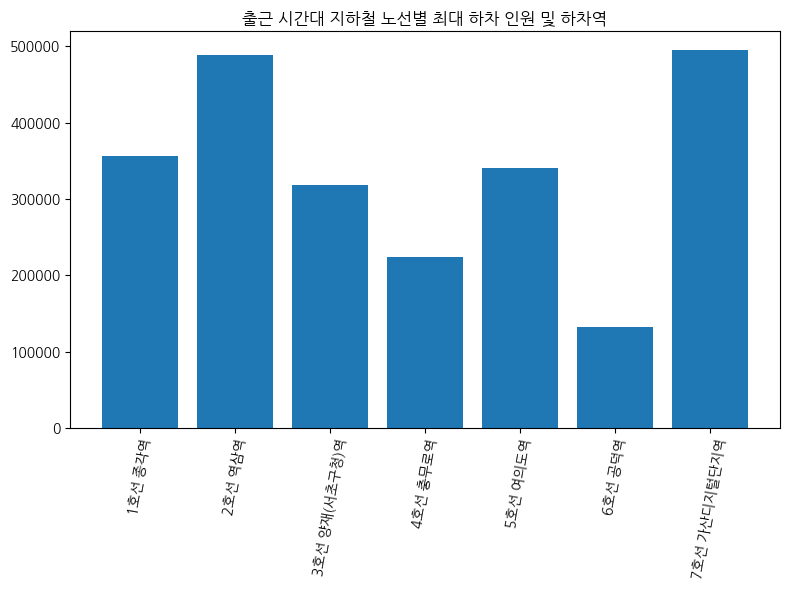

In [57]:
# 그래프 그리기
plt.figure(figsize=(8,6))
plt.bar(range(len(max_num_list)), max_num_list)
plt.xticks(range(len(max_num_list_xticks)), max_num_list_xticks, rotation=80)
plt.title("출근 시간대 지하철 노선별 최대 하차 인원 및 하차역")
plt.tight_layout()
plt.show()